# Electric Vehicle Routing Problem 2 -- Crossover und Mutation

Website des Wettbewerbs: https://mavrovouniotis.github.io/EVRPcompetition2020/

Problembeschreibung: https://mavrovouniotis.github.io/EVRPcompetition2020/TR-EVRP-Competition.pdf


Wenn Sie den Code in colab ausführen, dann müssen Sie **nichts** weiter tun: Data und Helfercode werden automatisch herunter geladen. Wenn Sie auf Ihrem eigenen Laptop arbeiten, laden Sie Daten und Helfercode unter 
* Daten: https://mavrovouniotis.github.io/EVRPcompetition2020/evrp-benchmark-set.zip
* Helfercode: https://raw.githubusercontent.com/henningbruhn/mobp/main/vrp_aufgabe/evrp.py

herunter, entpacken Sie die Daten und speichern Sie die Daten in einem Verzeichnis namens <code>data</code>. Das Verzeichnis <code>data</code> sowie <code>evrp.py</code> müssen im gleichen Verzeichnis wie dieses Notebook liegen. Kommentieren Sie schließlich die markierten Zeilen in der nächsten Zelle aus.

In [1]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
import time

path="data"

#### Wenn Sie den Code auf dem eigenen Laptop ausführen, kommentieren Sie die folgenden Zeilen aus ####
# download visualisation and helper code
!wget -q https://raw.githubusercontent.com/henningbruhn/mobp/main/vrp_aufgabe/evrp.py

# download and unpack instance data
!wget -q https://mavrovouniotis.github.io/EVRPcompetition2020/evrp-benchmark-set.zip
!unzip -qo evrp-benchmark-set.zip -d data
#### Ende auskommentieren ####

import evrp

Wir lesen die Instanzen ein und wählen uns eine zum Experimentieren aus.

In [2]:
instances=evrp.read_in_all_instances(path)
inst=instances['E-n33-k4']

Wir nutzen den Helfercode, um eine Zufallslösung zu erzeugen, die wir dann gleich visualisieren.

Reichweite überschritten!
Ladung 11890 übersteigt maximale Ladung von 8000!


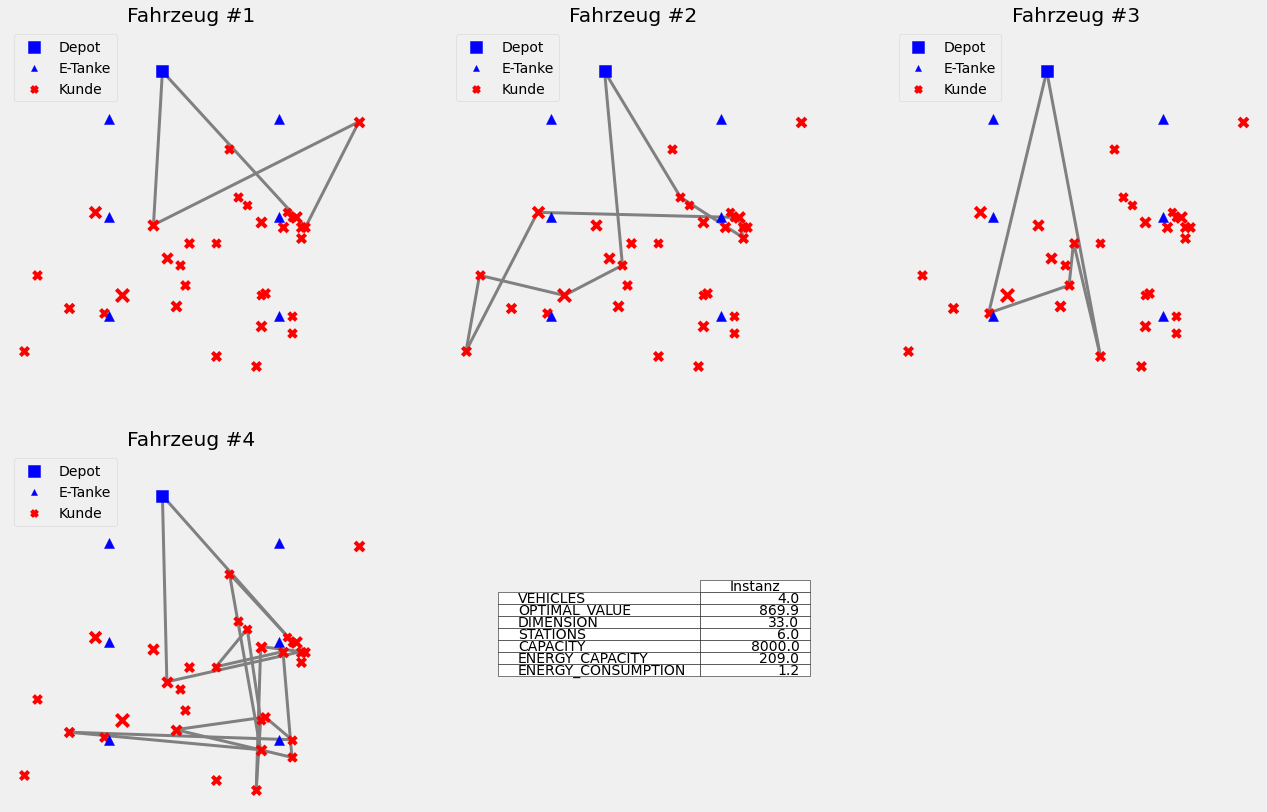

In [3]:
random_tour=evrp.rnd_tour(inst)
evrp.show(inst,tour=random_tour)

Die Lösung ist schlecht und wahrscheinlich nicht zulässig. Wir gucken uns noch an, wie die Losung dargestellt wird, und sehen, dass es sich einfach um eine Liste von Listen handelt, eine Liste pro Fahrzeug.

In [4]:
random_tour

[[1, 32, 5, 10],
 [16, 27, 30, 17, 31, 7, 8, 11, 3],
 [28, 18, 2, 25],
 [15, 9, 12, 24, 20, 13, 14, 33, 21, 26, 19, 22, 29, 23, 4, 6]]

## Genetischer Algorithmus

Als nächstes formulieren wir einen genetischen Algorithmus. Die entscheidenden Elemente (Mutation und Crossover) lassen wir noch weg.

In [5]:
def genetic_algo(instance,population_size,time_budget,record=False):
    """
    main routine for genetic algorithm
    instance: the EVRP instance
    population_size: how many solutions in a generation?
    time_budget: run for how much time? (in s)
    record: whether to keep track of all populations over the generations (for analytics)
    """
    start=time.time()
    population=compute_initial_population(instance,population_size)
    best=math.inf
    best_animal=None
    pop_over_generations=[]
    generation=0
    while time.time()-start<time_budget:
        generation+=1
        scores=compute_scores(population,instance)
        if record:
            pop_over_generations.append(population)
        best,best_animal=update_best(best,best_animal,scores,population)
        child_population=[]
        for i in range(population_size):
            parent1=select(population,scores)
            parent2=select(population,scores)
            child=crossover(parent1,parent2,instance)
            child=mutate(child,instance)            
            child_population.append(child)
        population=child_population
    if record:
        print("time elapsed: {}s".format(round(time.time()-start)))
        print("number of generations: {}".format(len(pop_over_generations)))
        return best_animal,pop_over_generations
    return best_animal

### global parameters that govern genetic algorithm
### this is a bit of a hack---better would be to encapsulate 
### the genetic algorithm in a proper class
### however, this makes for simpler code
SELECTION_SIZE=3

def select(population,scores):
    """pick best out of SELECTION_SIZE many random animals"""
    global SELECTION_SIZE
    N=len(population)
    choice=random.sample(range(N),SELECTION_SIZE)
    best=math.inf
    best_index=None
    for index in choice:
        if scores[index]<best:
            best=scores[index]
            best_index=index
    return population[best_index]
    
def mutate(tour,instance):
    """
    TODO: implement!
    """
    pass

    
def crossover(parent1,parent2,instance):
    """
    TODO: implement!
    """
    pass
    
def compute_initial_population(instance,N):
    """
    generate tours in random order, then run heuristic to insert charging stations as needed
    """
    population=[]
    for _ in range(N):
        tour=evrp.rnd_tour(instance)
        evrp.fix_range(tour,instance)
        population.append(tour)
    return population
        
def compute_scores(population,instance):
    """
    compute objective function for every solution
    """
    scores=[]
    for tour in population:
        score=evrp.soft_objective_function(tour,instance)
        scores.append(score)
    return scores

def update_best(best,best_animal,scores,population):
    """
    keep track of best solution seen so far
    returns current best solution
    """
    for score,animal in zip(scores,population):
        if score<best:
            best=score
            best_animal=animal
    return best,best_animal

TIME_BUDGET=60

## Aufgaben

* Wie kann eine geeignete Crossover-Operation aussehen?
* Wie kann eine geeignete Mutations-Operation aussehen?